In [35]:
import pandas as pd 
import streamlit as st 
import plotly.express as pt 
import math as mt
from math import factorial
#from scipy import stats as st
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import numpy as np
from scipy.stats import ttest_ind


In [3]:
df = pd.read_csv('../games.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.columns = df.columns.str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Podemos ver aqui 11 columnas, de las cuales algunas tienen datos vacios, y tipos de datos no muy adecuados para lo que son, lo cual
procedere a modificar.

In [5]:
# convierto a formato de año
df['year_of_release'] = pd.to_datetime(df['year_of_release'], format='%Y')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16713 non-null  object        
 1   platform         16715 non-null  object        
 2   year_of_release  16446 non-null  datetime64[ns]
 3   genre            16713 non-null  object        
 4   na_sales         16715 non-null  float64       
 5   eu_sales         16715 non-null  float64       
 6   jp_sales         16715 non-null  float64       
 7   other_sales      16715 non-null  float64       
 8   critic_score     8137 non-null   float64       
 9   user_score       10014 non-null  object        
 10  rating           9949 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 1.4+ MB


En la columna `user_score` se observa una gran cantidad de valores faltantes y únicamente 10 valores con las iniciales "tbd". Mi propuesta de solución es reemplazar estos valores "tbd" por `NaN`, lo que permitirá convertir la columna a un formato numérico. Posteriormente, realizaré gráficos de distribución comparando los datos originales con los datos imputados mediante la mediana, para evaluar si existe una diferencia significativa en las distribuciones. En caso de que no haya una diferencia notable o esta sea mínima, optaré por completar los valores faltantes con la mediana.

In [6]:
df['user_score'].isna().sum() #para ver el total de valores NaN que hay
df[df['user_score'] == 'tbd'].value_counts() #Saque el total de tbd que hay

name                           platform  year_of_release  genre   na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  rating
uDraw Studio                   Wii       2010-01-01       Misc    1.65      0.57      0.0       0.20         71.0          tbd         E         1
007: Quantum of Solace         DS        2008-01-01       Action  0.11      0.01      0.0       0.01         65.0          tbd         T         1
101-in-1 Explosive Megamix     DS        2008-01-01       Puzzle  0.05      0.12      0.0       0.02         46.0          tbd         E         1
101-in-1 Sports Party Megamix  Wii       2010-01-01       Sports  0.02      0.00      0.0       0.00         41.0          tbd         E10+      1
4x4 EVO 2                      GC        2002-01-01       Racing  0.11      0.03      0.0       0.00         56.0          tbd         E         1
                                                                                                                           

In [7]:
#primero reemplazare con nan los valores tbd
df['user_score'].replace("tbd", np.nan, inplace=True)
#luego convertire la columna a numerica para poder hacer operaciones
df['user_score'] = pd.to_numeric(df['user_score'])
df['user_score'].describe()


C:\Users\HL4ev\AppData\Local\Temp\ipykernel_4260\3970175917.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['user_score'].replace("tbd", np.nan, inplace=True)


count    7590.000000
mean        7.125046
std         1.500006
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

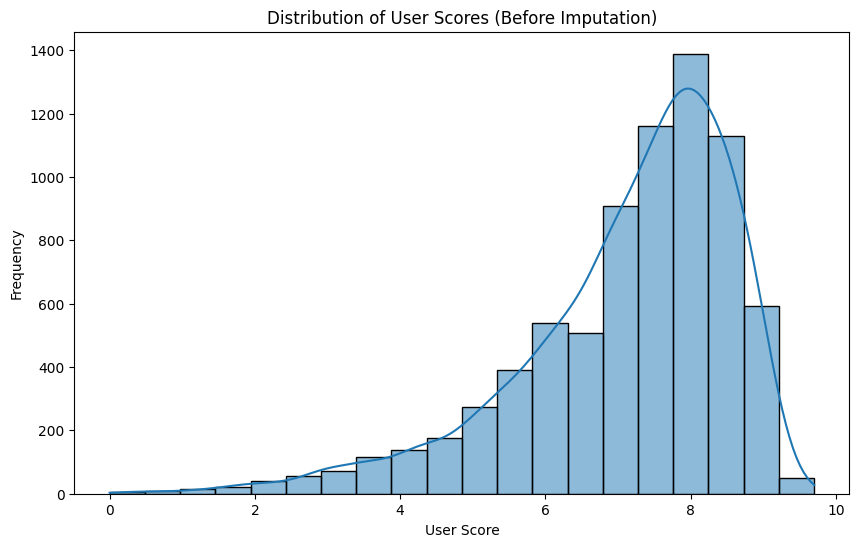

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df['user_score'], kde=True, bins=20)
plt.title('Distribution of User Scores (Before Imputation)')
plt.xlabel('User Score')
plt.ylabel('Frequency')
plt.show()

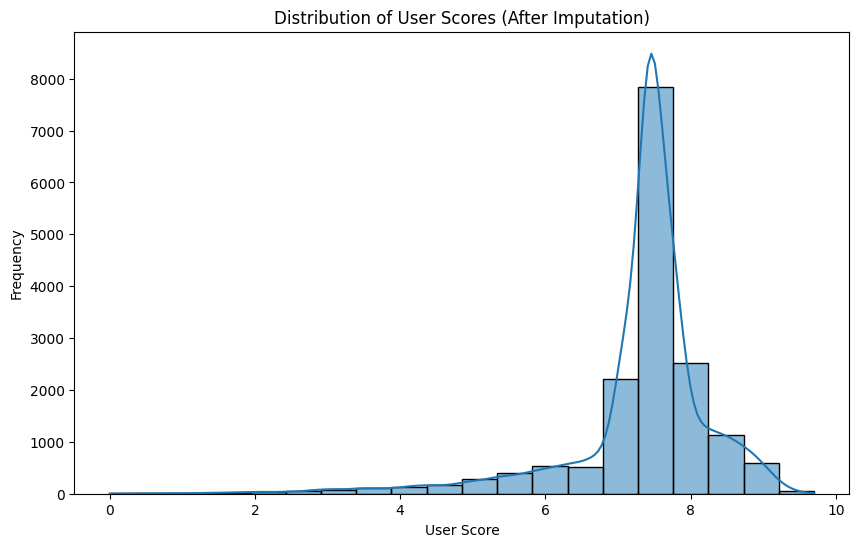

In [9]:
df['user_score'] = df.groupby('genre')['user_score'].transform(lambda x: x.fillna(x.median()))
plt.figure(figsize=(10, 6))
sns.histplot(df['user_score'], kde=True, bins=20)
plt.title('Distribution of User Scores (After Imputation)')
plt.xlabel('User Score')
plt.ylabel('Frequency')
plt.show()


In [10]:
df.info()
df[df['user_score'].isna()]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16713 non-null  object        
 1   platform         16715 non-null  object        
 2   year_of_release  16446 non-null  datetime64[ns]
 3   genre            16713 non-null  object        
 4   na_sales         16715 non-null  float64       
 5   eu_sales         16715 non-null  float64       
 6   jp_sales         16715 non-null  float64       
 7   other_sales      16715 non-null  float64       
 8   critic_score     8137 non-null   float64       
 9   user_score       16713 non-null  float64       
 10  rating           9949 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 1.4+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993-01-01,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993-01-01,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Hay 2 columnas en las que se observa que tanto el nombre, como genero, como los scores y el rating, son NaN, por lo tanto las borrare

In [11]:
df = df.drop(df.iloc[[659, 14244]].index)
df.shape
df['user_score'].isna().sum()


np.int64(0)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16713 non-null  object        
 1   platform         16713 non-null  object        
 2   year_of_release  16444 non-null  datetime64[ns]
 3   genre            16713 non-null  object        
 4   na_sales         16713 non-null  float64       
 5   eu_sales         16713 non-null  float64       
 6   jp_sales         16713 non-null  float64       
 7   other_sales      16713 non-null  float64       
 8   critic_score     8137 non-null   float64       
 9   user_score       16713 non-null  float64       
 10  rating           9949 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 1.5+ MB


En critic_score hay mas de la mitad de datos vacios, procedere a analizar por que estan asi y que se puede hacer con los mismos. Hice comparaciones para ver,
si la fecha, el genero o la plataforma influia en porque habia tantos datos vacios en la columna, pero no parece existir un corelacion entre los datos ausentes de critic_score y estas columnas, pues en todas estas hay datos vacios en cantidades similares. Por lo tanto procedere a llenarlas con la mediana.

In [13]:
df['user_score'].describe()

count    16713.000000
mean         7.310088
std          1.035561
min          0.000000
25%          7.100000
50%          7.400000
75%          7.800000
max          9.700000
Name: user_score, dtype: float64

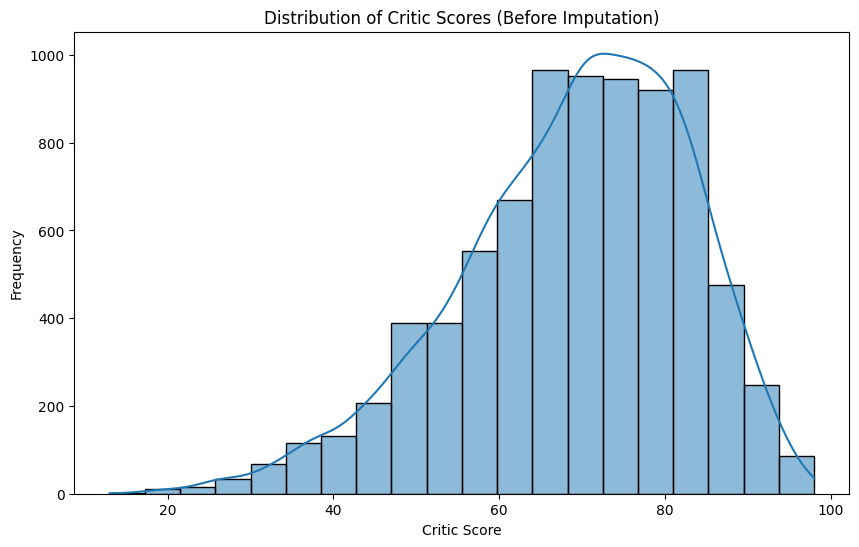

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df['critic_score'], kde=True, bins=20)
plt.title('Distribution of Critic Scores (Before Imputation)')
plt.xlabel('Critic Score')
plt.ylabel('Frequency')
plt.show()

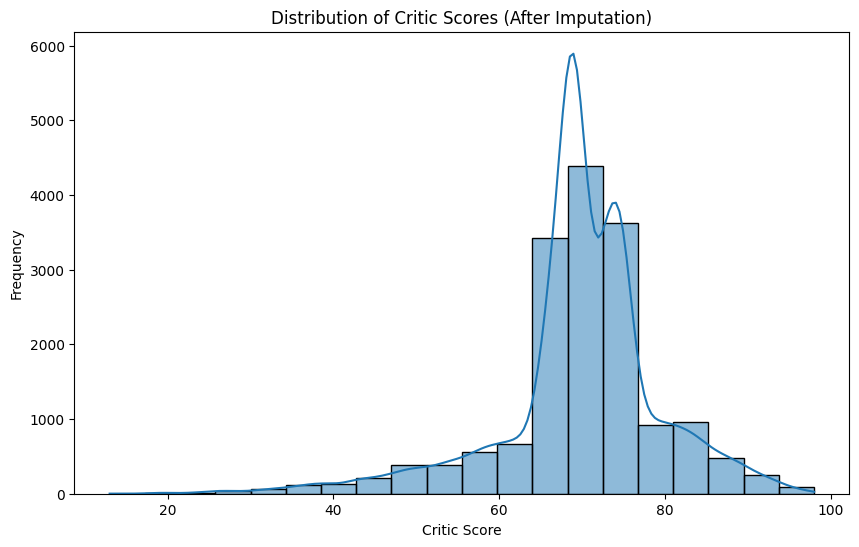

In [15]:
df['critic_score'] = df.groupby('genre')['critic_score'].transform(lambda x: x.fillna(x.median()))
plt.figure(figsize=(10, 6))
sns.histplot(df['critic_score'], kde=True, bins=20)
plt.title('Distribution of Critic Scores (After Imputation)')
plt.xlabel('Critic Score')
plt.ylabel('Frequency')
plt.show()

In [16]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16713 non-null  object        
 1   platform         16713 non-null  object        
 2   year_of_release  16444 non-null  datetime64[ns]
 3   genre            16713 non-null  object        
 4   na_sales         16713 non-null  float64       
 5   eu_sales         16713 non-null  float64       
 6   jp_sales         16713 non-null  float64       
 7   other_sales      16713 non-null  float64       
 8   critic_score     16713 non-null  float64       
 9   user_score       16713 non-null  float64       
 10  rating           9949 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 1.5+ MB


In [17]:
df['year_of_release']



0       2006-01-01
1       1985-01-01
2       2008-01-01
3       2009-01-01
4       1996-01-01
           ...    
16710   2016-01-01
16711   2006-01-01
16712   2016-01-01
16713   2003-01-01
16714   2016-01-01
Name: year_of_release, Length: 16713, dtype: datetime64[ns]

Vemos que hay 269 missing values en la columna de year_of_release, no estaba seguro de como llenarlos correctamente, o si dejarlos vacios, decidi llenarlos con la mediana agrupada por plataforma, ya que de otras formas puede afectar el analisis de manera significativa para calculos posteriores.

In [18]:
df['year_of_release'] = pd.to_datetime(df['year_of_release'], format='%Y')
df.info()
df_years=df['year_of_release'].dt.year
df['year_of_release'] = df.groupby('platform')['year_of_release'].transform(lambda x: x.fillna(x.median()))


<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16713 non-null  object        
 1   platform         16713 non-null  object        
 2   year_of_release  16444 non-null  datetime64[ns]
 3   genre            16713 non-null  object        
 4   na_sales         16713 non-null  float64       
 5   eu_sales         16713 non-null  float64       
 6   jp_sales         16713 non-null  float64       
 7   other_sales      16713 non-null  float64       
 8   critic_score     16713 non-null  float64       
 9   user_score       16713 non-null  float64       
 10  rating           9949 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 1.5+ MB


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16713 non-null  object        
 1   platform         16713 non-null  object        
 2   year_of_release  16713 non-null  datetime64[ns]
 3   genre            16713 non-null  object        
 4   na_sales         16713 non-null  float64       
 5   eu_sales         16713 non-null  float64       
 6   jp_sales         16713 non-null  float64       
 7   other_sales      16713 non-null  float64       
 8   critic_score     16713 non-null  float64       
 9   user_score       16713 non-null  float64       
 10  rating           9949 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 1.5+ MB


Observando los datos de ratings, procedere a usar el valor 'unknown' para completar ya que es de tipo categorico.

In [20]:
df['rating'] = df['rating'].fillna('unknown')
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16713 non-null  object        
 1   platform         16713 non-null  object        
 2   year_of_release  16713 non-null  datetime64[ns]
 3   genre            16713 non-null  object        
 4   na_sales         16713 non-null  float64       
 5   eu_sales         16713 non-null  float64       
 6   jp_sales         16713 non-null  float64       
 7   other_sales      16713 non-null  float64       
 8   critic_score     16713 non-null  float64       
 9   user_score       16713 non-null  float64       
 10  rating           16713 non-null  object        
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 1.5+ MB


Ahora que esta completa la primera parte ya solo falta sacar las ventas totales por region y por juego.

In [21]:
df['total_sales']= df[['na_sales', 'eu_sales', 'jp_sales','other_sales']].sum(axis=1)
df.sample(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
4322,Crash of the Titans,Wii,2007-01-01,Action,0.39,0.02,0.00,0.03,69.0,5.8,E10+,0.44
6053,One Piece Unlimited Cruise 2: Awakening of a Hero,Wii,2009-01-01,Action,0.00,0.10,0.17,0.02,68.0,7.4,unknown,0.29
15704,Writing and Speaking Beautiful Japanese DS,DS,2008-01-01,Misc,0.00,0.00,0.02,0.00,69.0,7.1,unknown,0.02
7014,Ashes Cricket 2009,Wii,2009-01-01,Sports,0.00,0.22,0.00,0.01,75.0,7.4,unknown,0.23
13387,World Series of Poker: Tournament of Champions...,Wii,2006-01-01,Misc,0.04,0.00,0.00,0.00,69.0,7.1,unknown,0.04
4729,Harvest Moon: Grand Bazaar,DS,2008-01-01,Simulation,0.21,0.05,0.13,0.02,70.0,7.5,unknown,0.41
926,FIFA 2000,PS,1998-01-01,Sports,0.22,1.47,0.04,0.14,75.0,7.4,unknown,1.87
14921,Air Conflicts: Secret Wars,PC,2011-01-01,Simulation,0.00,0.02,0.00,0.01,65.0,6.4,T,0.03
12612,Record of Lodoss War: Eiyuu Sensou,SCD,1994-01-01,Role-Playing,0.00,0.00,0.06,0.00,74.0,7.8,unknown,0.06
8717,Burnout 2: Point of Impact,GC,2003-01-01,Racing,0.12,0.03,0.00,0.00,89.0,8.5,E,0.15


En el siguiente paso procedere a realizar una agrupacion de datos para sacar las ventas totales por año.

In [22]:
games_per_year = df.groupby('year_of_release')['name'].count().reset_index()
games_per_year.columns = ['year_of_release', 'games_count']
games_per_year.sort_values(by='year_of_release')


,year_of_release,games_count
0,1980-01-01,9
1,1981-01-01,46
2,1982-01-01,53
3,1983-01-01,17
4,1984-01-01,14
5,1985-01-01,14
6,1986-01-01,21
7,1987-01-01,16
8,1988-01-01,15
9,1989-01-01,17


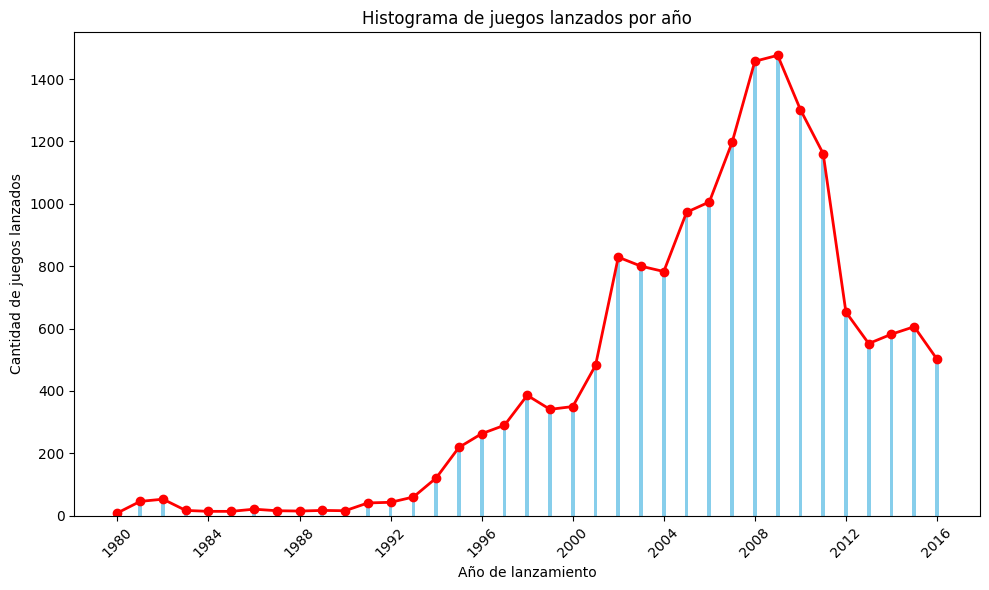

In [23]:
# Histograma de la cantidad de juegos lanzados por año
plt.figure(figsize=(10, 6))
bars = plt.bar(games_per_year['year_of_release'], games_per_year['games_count'], color='skyblue', width=60)
plt.plot(games_per_year['year_of_release'], games_per_year['games_count'], color='red', marker='o', linestyle='-', linewidth=2)

# Etiquetas y título
plt.xlabel('Año de lanzamiento')
plt.ylabel('Cantidad de juegos lanzados')
plt.title('Histograma de juegos lanzados por año')

# Mostrar el gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Los datos anteriormente mostrados, muestran que a partir de 1996 hubo un incremento en cuanto a la produccion de juegos significantemente. 

Ahora sacare las ventas totales por plataforma.

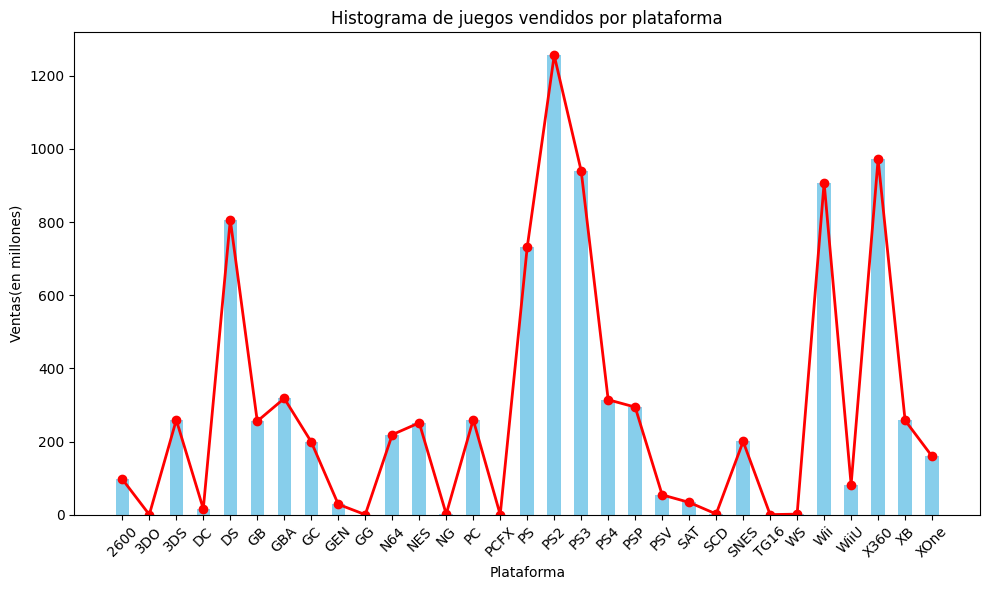

In [24]:
grouped_sales = df.groupby('platform')['total_sales'].sum().reset_index()
grouped_sales.columns = ['platform', 'total_sales']
grouped_sales.sort_values(by='total_sales')
plt.figure(figsize=(10, 6))
bars = plt.bar(grouped_sales['platform'], grouped_sales['total_sales'], color='skyblue', width=0.5)
plt.plot(grouped_sales['platform'], grouped_sales['total_sales'], color='red', marker='o', linestyle='-', linewidth=2)

# Etiquetas y título
plt.xlabel('Plataforma')
plt.ylabel('Ventas(en millones)')
plt.title('Histograma de juegos vendidos por plataforma')

# Mostrar el gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

En el grafico anterior se ve claramente que la plataforma PS2 ha tenido mas ventas que ninguna otra.

Ahora procedere a crear un scatter plot, donde se veran reflejadas las ventas por año de las 5 plataformas que mas ventas tienen en total.

      platform year_of_release  total_sales
0          Wii      2006-01-01        82.54
2          Wii      2008-01-01        35.52
3          Wii      2009-01-01        32.77
6           DS      2006-01-01        29.80
7          Wii      2006-01-01        28.91
...        ...             ...          ...
16700       DS      2009-01-01         0.01
16704       DS      2008-01-01         0.01
16709      PS2      2008-01-01         0.00
16710      PS3      2016-01-01         0.01
16711     X360      2006-01-01         0.01

[8225 rows x 3 columns]


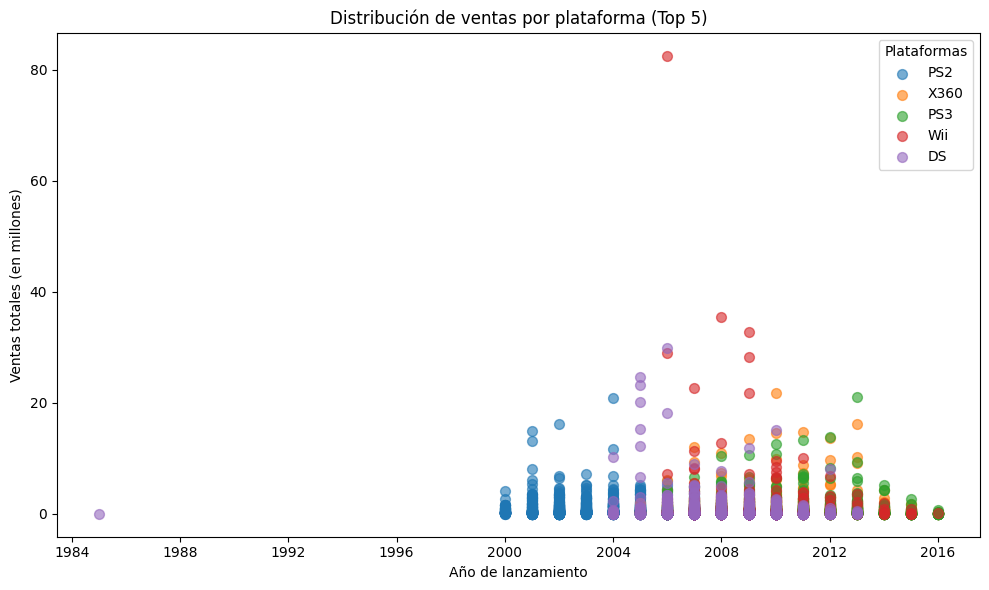

In [25]:
head_sales=grouped_sales.sort_values(by='total_sales', ascending=False).head()
top_5_platforms=head_sales
top_5_sales = df[df['platform'].isin(top_5_platforms['platform'])]
print(top_5_sales[['platform', 'year_of_release', 'total_sales']])
# Set up the plot
plt.figure(figsize=(10, 6))

# Create a scatter plot for each platform
for platform in top_5_platforms['platform']:
    platform_data = top_5_sales[top_5_sales['platform'] == platform]
    plt.scatter(platform_data['year_of_release'], platform_data['total_sales'],
                label=platform, alpha=0.6, s=50)

# Add labels, title, and legend
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas totales (en millones)')
plt.title('Distribución de ventas por plataforma (Top 5)')

# Display the legend
plt.legend(title='Plataformas')

# Show the plot
plt.tight_layout()
plt.show()

Con el grafico 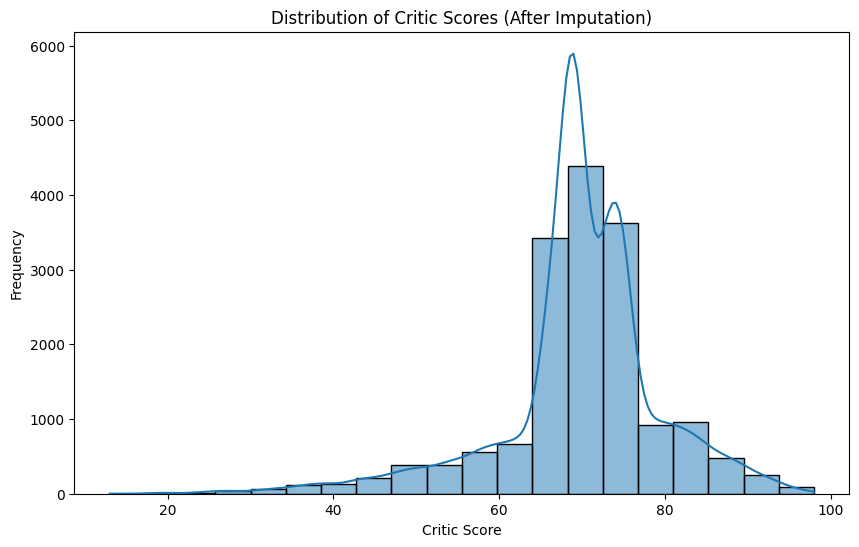

In [26]:

# Count the number of releases per platform per year
platforms_per_year = df.groupby(['year_of_release', 'platform']).value_counts().reset_index(name='release_count')

# Sort values by year and platform
platforms_per_year = platforms_per_year.sort_values(by=['year_of_release', 'release_count'], ascending=[True, False])



# Find platforms that were popular but now have fewer releases (based on some criteria)
# For example, finding platforms that have a higher number of releases in the past but fewer in recent years

# Identify platforms that had the highest releases in past years
recent_years = platforms_per_year[platforms_per_year['year_of_release'].dt.year >= 2015]  # Adjust for the years of interest
older_years = platforms_per_year[platforms_per_year['year_of_release'].dt.year < 2015]  # Adjust for the years of interest
print(recent_years)
print(older_years)
# Group by platform and sum the releases
recent_platforms = recent_years.groupby('platform')['release_count'].sum().reset_index()
older_platforms = older_years.groupby('platform')['release_count'].sum().reset_index()

# Merge recent and older years' data
platform_trends = pd.merge(older_platforms, recent_platforms, on='platform', how='outer', suffixes=('_older', '_recent'))

# Filter for platforms with more releases in older years than in recent years
non_popular_platforms = platform_trends[platform_trends['release_count_older'] > platform_trends['release_count_recent']]

# Show platforms that were once popular but are now less popular
print(non_popular_platforms)


      year_of_release platform                                        name  \
15605      2015-01-01      3DS                           Fire Emblem Fates   
15606      2015-01-01      3DS                    7th Dragon III Code: VFD   
15607      2015-01-01      3DS  Adventure Time: Finn & Jake Investigations   
15608      2015-01-01      3DS                     Aikatsu! My No.1 Stage!   
15609      2015-01-01      3DS        Animal Crossing: Happy Home Designer   
...               ...      ...                                         ...   
16708      2016-01-01     XOne                                    WWE 2K17   
16709      2016-01-01     XOne                                Watch Dogs 2   
16710      2016-01-01     XOne                                  Worms: WMD   
16711      2016-01-01     XOne                                      XCOM 2   
16712      2016-01-01     XOne                                      ZombiU   

              genre  na_sales  eu_sales  jp_sales  other_sales 

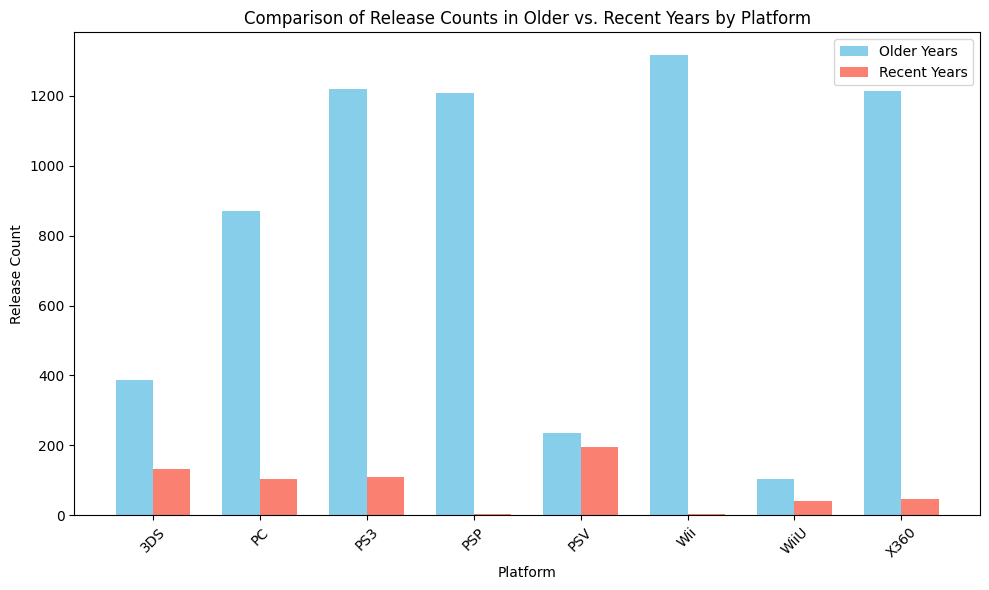

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Filter non-popular platforms
platforms = non_popular_platforms['platform']
data_older = non_popular_platforms['release_count_older']
data_recent = non_popular_platforms['release_count_recent']

# Set up the positions and width for bars
x = np.arange(len(platforms))  # the label locations
width = 0.35  # the width of the bars

# Create the grouped bar plot
fig, ax = plt.subplots(figsize=(10, 6))
bars_older = ax.bar(x - width/2, data_older, width, label='Older Years', color='skyblue')
bars_recent = ax.bar(x + width/2, data_recent, width, label='Recent Years', color='salmon')

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Platform')
ax.set_ylabel('Release Count')
ax.set_title('Comparison of Release Counts in Older vs. Recent Years by Platform')
ax.set_xticks(x)
ax.set_xticklabels(platforms, rotation=45)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


Ahora que tenemos las plataformas que solian ser populares pero dejaron de serlo, procedere a analizar cuanto tardan en desaparecer y las nuevas en aparecer.

In [28]:
# Agrupar los datos por plataforma y calcular los años de primera y última aparición
platform_lifetime = df.groupby('platform')['year_of_release'].agg(['min', 'max']).reset_index()
platform_lifetime.columns = ['platform', 'first_appearance', 'last_appearance']

# Calcular la duración (vida útil) de cada plataforma
platform_lifetime['duration'] = platform_lifetime['last_appearance'] - platform_lifetime['first_appearance']

# Calcular el tiempo promedio que tardan en aparecer y desaparecer
average_duration = platform_lifetime['duration'].mean()
median_duration = platform_lifetime['duration'].median()

# Mostrar los resultados
print("Tiempo promedio de vida útil de las plataformas:", average_duration, "años")
print("Mediana de vida útil de las plataformas:", median_duration, "años")
platform_lifetime.head()


Tiempo promedio de vida útil de las plataformas: 2780 days 11:36:46.451612896 años
Mediana de vida útil de las plataformas: 2192 days 00:00:00 años


,platform,first_appearance,last_appearance,duration
0,2600,1980-01-01,1989-01-01,3288 days
1,3DO,1994-01-01,1995-01-01,365 days
2,3DS,2011-01-01,2016-01-01,1826 days
3,DC,1998-01-01,2008-01-01,3652 days
4,DS,1985-01-01,2013-01-01,10227 days


Para poder crear un modelo para 2017 creo buena idea considerar datos desde 2005 para hacer una buena recopliacion que tenga historia, lo tomo desde 2005 porque 2016 tiene casi nada de datos.

In [29]:
df_new= df[df['year_of_release'].dt.year>=2005]
df_new

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006-01-01,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006-01-01,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16709,SCORE International Baja 1000: The Official Game,PS2,2008-01-01,Racing,0.00,0.00,0.00,0.00,69.0,7.4,unknown,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016-01-01,Action,0.00,0.00,0.01,0.00,68.0,7.4,unknown,0.01
16711,LMA Manager 2007,X360,2006-01-01,Sports,0.00,0.01,0.00,0.00,75.0,7.4,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016-01-01,Adventure,0.00,0.00,0.01,0.00,66.0,7.6,unknown,0.01


Con el codigo que ya teniamos y el grafico siguiente, podemos ver claramente cuales son las plataformas mas rentables.
Siendo el x360, el wii, el ps2, el ps3, y el ds.

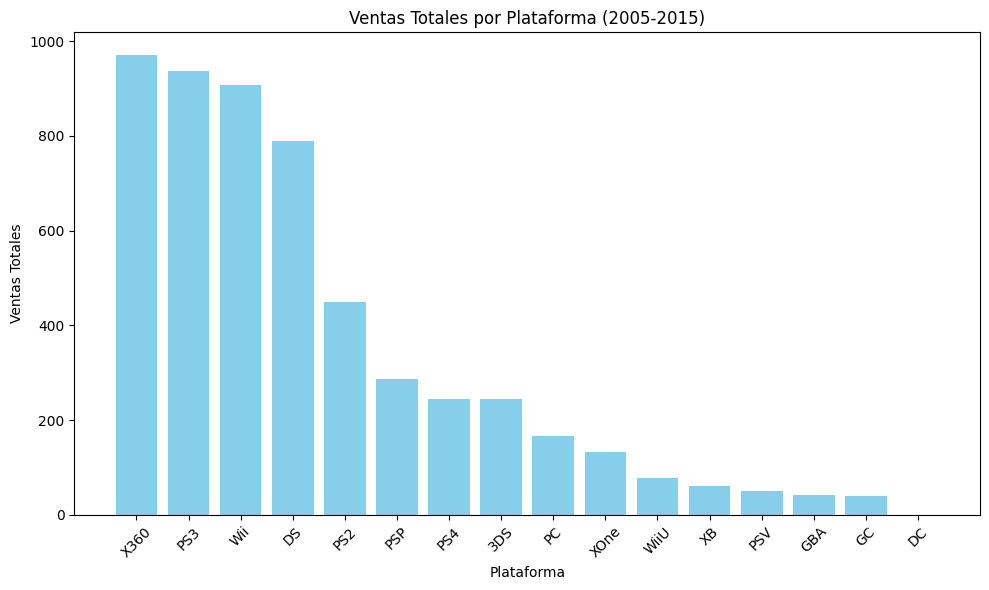

In [30]:
# Filtrar datos de 2005 a 2015
filtered_df = df[(df['year_of_release'].dt.year >= 2005) & (df['year_of_release'].dt.year <= 2015)]

# Calcular las ventas totales por plataforma en este período
platform_sales = filtered_df.groupby('platform')['total_sales'].sum().reset_index()
platform_sales = platform_sales.sort_values(by='total_sales', ascending=False)

# Seleccionar las plataformas principales
top_platforms = platform_sales.head(5)['platform']
top_platform_data = filtered_df[filtered_df['platform'].isin(top_platforms)]

# Identificar tendencias de crecimiento o declive #
# Calcula las ventas por plataforma año a año
sales_by_year = filtered_df.groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index()

# Divide el periodo en dos para observar si están creciendo o decreciendo
first_half = sales_by_year[sales_by_year['year_of_release'].dt.year <= 2010]
second_half = sales_by_year[sales_by_year['year_of_release'].dt.year > 2010]

# Calcular las ventas totales de cada plataforma en cada mitad
first_half_sales = first_half.groupby('platform')['total_sales'].sum().reset_index()
second_half_sales = second_half.groupby('platform')['total_sales'].sum().reset_index()

# Fusionar los datos para ver la comparación entre ambas mitades
platform_trends = pd.merge(first_half_sales, second_half_sales, on='platform', suffixes=('_2005_2010', '_2011_2015'))

# 4. Seleccionar plataformas rentables con tendencias de crecimiento
platform_trends['trend'] = platform_trends['total_sales_2011_2015'] - platform_trends['total_sales_2005_2010']

# Gráfico de barras - Ventas totales por plataforma (2005-2015)
plt.figure(figsize=(10, 6))
plt.bar(platform_sales['platform'], platform_sales['total_sales'], color='skyblue')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales')
plt.title('Ventas Totales por Plataforma (2005-2015)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Aqui lo que hice fue primero sacar la suma de las ventas globales por plataforma y la mediana de las ventas por plataforma, permitiendome asi analizar los datos un poco mas a profundidad, viendo que definitivamente hay una gran diferencia de ventas entre plataformas, como ya se vio antes, algunas son demasiado populares comparadas con otras, despues hice un diagrama de caja para ver graficamente las diferencias de ventas, lo hice con una escala logaritmica para que pudieran apreciarse los datos de mejor manera.

In [31]:
global_sales = df_new.groupby('platform')['total_sales'].sum().reset_index()
global_sales.columns = ['platform', 'total_sales_worldwide']

# Calcula el promedio de ventas por plataforma
average_sales_by_platform = df_new.groupby('platform')['total_sales'].median().reset_index()
average_sales_by_platform.columns = ['platform', 'average_sales_by_platform']

# Haz un merge para combinar ambas métricas en la misma tabla
global_sales = global_sales.merge(average_sales_by_platform, on='platform')

# Ordena la tabla por ventas totales en orden descendente
global_sales = global_sales.sort_values(by='total_sales_worldwide', ascending=False)

# Imprime el resultado
global_sales

,platform,total_sales_worldwide,average_sales_by_platform
13,X360,971.42,0.280
7,PS3,939.65,0.270
11,Wii,907.51,0.190
2,DS,788.83,0.110
6,PS2,448.67,0.170
8,PS4,314.14,0.200
9,PSP,286.99,0.090
0,3DS,259.00,0.120
5,PC,171.55,0.050
15,XOne,159.32,0.220


In [32]:
# Create a boxplot with the log-transformed sales
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_new, x='platform', y='log_total_sales', color="skyblue")
plt.xlabel('Platform')
plt.ylabel('Log of Total Sales (in millions)')
plt.title('Global Sales Distribution by Platform (Log Scale)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

ValueError: Could not interpret value `log_total_sales` for `y`. An entry with this name does not appear in `data`.

<Figure size 1400x800 with 0 Axes>

Al analizar la plataforma X360, realicé una agrupación de las ventas según las reseñas, donde la categoría 'E' resultó ser la más vendida. Para facilitar el análisis de correlación y la representación en un gráfico de dispersión, mapeé las reseñas y las convertí en valores enteros. Los resultados indicaron que no existe una relación significativa entre las calificaciones y las ventas; en cambio, factores como la popularidad de la plataforma, las criticas de profesionales y el juego parecen influir más en el volumen de ventas.

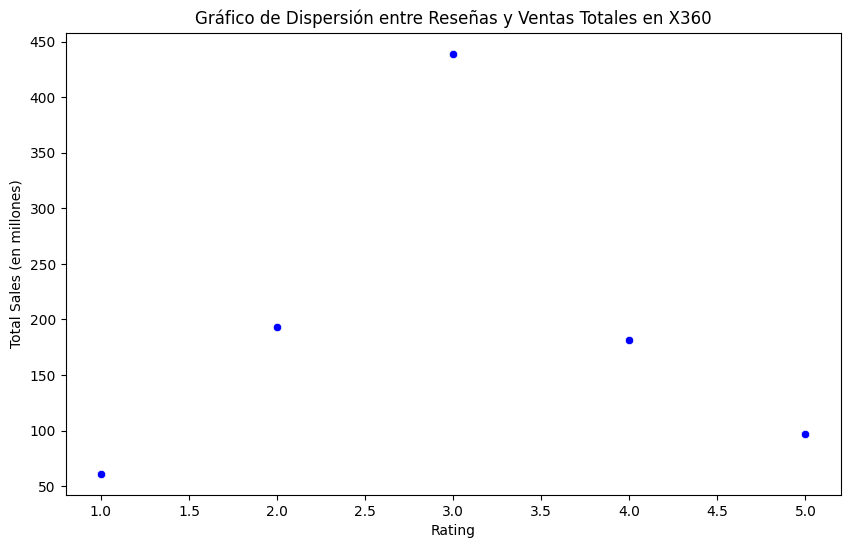

La correlación entre las reseñas y las ventas en X360 es: 0.06


,rating,total_sales
0,4,181.11
1,5,96.69
2,3,439.14
3,2,193.28
4,1,61.20


In [ ]:
xbox_data = df_new[df_new['platform'] == 'X360']
ratings = xbox_data.groupby('rating')['total_sales'].sum().reset_index()

ratings['rating'] = ratings['rating'].map({'unknown': 1, 'T': 2, 'M': 3, 'E': 4, 'E10+':5})  # Ejemplo de mapeo si es categórico

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ratings, x='rating', y='total_sales', color="blue")
plt.title('Gráfico de Dispersión entre Reseñas y Ventas Totales en X360')
plt.xlabel('Rating')
plt.ylabel('Total Sales (en millones)')
plt.show()

# Calcular la correlación
correlation = ratings['rating'].corr(ratings['total_sales'])
print(f"La correlación entre las reseñas y las ventas en X360 es: {correlation:.2f}")
ratings


Ahora hice lo mismo pero con la columna critic_score, donde definitivamente se ve que afecta de manera significativa las ventas, ya que existe una correlacion fuerte entre las variables analizadas.

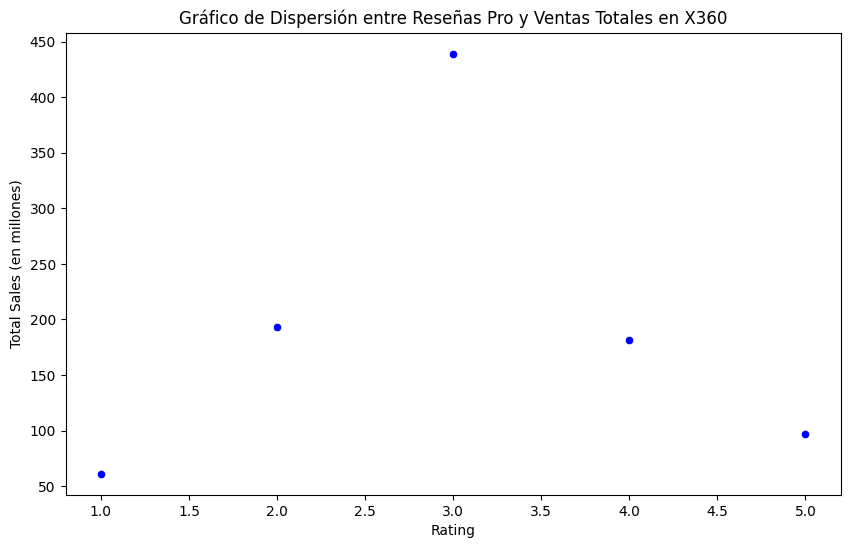

La correlación entre las reseñas y las ventas en X360 es: 0.73


,critic_score,total_sales
0,19.0,0.06
1,21.0,0.12
2,25.0,0.37
3,26.0,0.46
4,28.0,0.22
...,...,...
69,94.0,50.10
70,95.0,8.40
71,96.0,16.53
72,97.0,16.27


In [ ]:
xbox_data_pro = df_new[df_new['platform'] == 'X360']
critics_pro = xbox_data.groupby('critic_score')['total_sales'].sum().reset_index()

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ratings, x='rating', y='total_sales', color="blue")
plt.title('Gráfico de Dispersión entre Reseñas Pro y Ventas Totales en X360')
plt.xlabel('Rating')
plt.ylabel('Total Sales (en millones)')
plt.show()

# Calcular la correlación
correlation = critics_pro['critic_score'].corr(critics_pro['total_sales'])
print(f"La correlación entre las reseñas y las ventas en X360 es: {correlation:.2f}")
critics_pro

Haciendo este pequeno analisis sobre los generos mas rentables, se observa que son los de accion, deportes y los shooters los 3 mas vendidos siendo en su contraparte los de aventura, puzzle y estrategia los menos vendidos. Creo que se puede generalizar ya que a lo largo de los anos es notable que al menos en este analisis de 10 anos de informacion, son los mas fuertes en ventas los mismos.

In [ ]:
genres_sales = df_new.groupby('genre')['total_sales'].sum().reset_index()
genres_sales_asc=genres_sales.sort_values(by='total_sales', ascending=False)
genres_sales_head = genres_sales_asc.head()
genres_sales_tail = genres_sales_asc.tail()
print(genres_sales_head)
genres_sales_tail

           genre  total_sales
0         Action      1221.34
10        Sports       870.41
8        Shooter       764.73
3           Misc       626.85
7   Role-Playing       553.81


,genre,total_sales
9,Simulation,271.63
2,Fighting,211.74
1,Adventure,150.17
5,Puzzle,110.99
11,Strategy,80.08


En el siguiente codigo, me encargue de agrupar por region y (plataforma, genero, ratings), para ver cuales eran las mejores plataformas, por region asi como los mejores generos, viendo tambien la suma de sus ratings.

In [ ]:
regions = ['na_sales', 'eu_sales', 'jp_sales']

# Función para obtener las cinco plataformas principales por región
def top_platforms(df_new, region):
    return df.groupby('platform')[region].sum().nlargest(5)

# Función para obtener los cinco géneros principales por región
def top_genres(df_new, region):
    return df.groupby('genre')[region].sum().nlargest(5)

# Función para obtener las ventas por clasificación ESRB en cada región
def esrb_sales(df_new, region):
    return df.groupby('rating')[region].sum()

# Diccionario para almacenar los resultados
summary = {}

for region in regions:
    summary[region] = {
        'Top Platforms': top_platforms(df_new, region),
        'Top Genres': top_genres(df_new, region),
        'ESRB Sales': esrb_sales(df_new, region)
    }

# Imprimir resultados
for region, data in summary.items():
    print(f"\n--- {region} ---")
    print("Top 5 Platforms:")
    print(data['Top Platforms'])
    print("\nTop 5 Genres:")
    print(data['Top Genres'])
    print("\nESRB Sales:")
    print(data['ESRB Sales'])



--- na_sales ---
Top 5 Platforms:
platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64

Top 5 Genres:
genre
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27
Name: na_sales, dtype: float64

ESRB Sales:
rating
AO            1.26
E          1292.99
E10+        353.32
EC            1.53
K-A           2.56
M           748.48
RP            0.00
T           759.75
unknown    1240.68
Name: na_sales, dtype: float64

--- eu_sales ---
Top 5 Platforms:
platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64

Top 5 Genres:
genre
Action     519.13
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74
Name: eu_sales, dtype: float64

ESRB Sales:
rating
AO           0.61
E          710.25
E10+       188.52
EC           0.11
K-A          0.27
M          483.97
RP           0.08
T          427.03
unknown    613.30
Name: e

Variaciones en plataformas:
   - NA y EU: Domina PlayStation, Xbox y Wii.  
   - JP: Preferencia por portátiles y consolas clásicas como DS y SNES.

Diferencias en géneros:
   - NA y EU: Acción, deportes y shooters lideran.  
   - **JP**: Predominan los RPG.

Impacto ESRB:
   - NA y EU: Juegos E (Everyone) lideran, seguidos de T (Teen) y M (Mature).  
   - JP: Menor impacto del ESRB; predomina la categoría unknown debido a diferencias en sistemas de clasificación.

In [37]:
xbox_one_ratings = df[df['platform'] == 'XOne']['user_score'].dropna()
pc_ratings = df[df['platform'] == 'PC']['user_score'].dropna()
action_ratings = df[df['genre'] == 'Action']['user_score'].dropna()
sports_ratings = df[df['genre'] == 'Sports']['user_score'].dropna()

# Prueba t
print("Prueba t Xbox One vs PC:", ttest_ind(xbox_one_ratings, pc_ratings, equal_var=True))
print("Prueba t Acción vs Deportes:", ttest_ind(action_ratings, sports_ratings, equal_var=True))


Prueba t Xbox One vs PC: TtestResult(statistic=np.float64(-4.151408185237929), pvalue=np.float64(3.534136669437999e-05), df=np.float64(1219.0))
Prueba t Acción vs Deportes: TtestResult(statistic=np.float64(0.6215584341142232), pvalue=np.float64(0.5342570517131008), df=np.float64(5715.0))


Se decidio tomar la prueba ttest_ind porque se estan comparando medias de grupos totalmente independientes, el valor de significancia es de 0.05 lo cual indica que la hipotesis nula sera rechazada en caso de que el p value sea menor que 0.05.

Conclusion General del Proyecto.

El análisis de datos sobre ventas de videojuegos ha permitido identificar patrones clave en las preferencias de los consumidores según región, plataforma y género, así como el impacto de las clasificaciones ESRB en las ventas. Se destacan variaciones significativas en cuotas de mercado regionales, con plataformas y géneros dominantes cambiando según las preferencias locales. Además, las pruebas estadísticas realizadas sugieren diferencias en las calificaciones de usuarios entre plataformas y géneros, aunque algunas correlaciones entre reseñas y ventas resultaron débiles.

Estos hallazgos proporcionan una base sólida para la toma de decisiones estratégicas en la industria de los videojuegos, enfocándose en mercados específicos y adaptando estrategias de marketing y desarrollo. Este proyecto demuestra cómo el análisis de datos puede transformar información en decisiones informadas, alineadas con los objetivos comerciales.